# Analysis On Covid Situation In Pakistan

The COVID-19 outbreak was treated as a case of pneumonia with unknown etiology appeared in the Wuhan city of China, at the end of December 2019, Which spread rapidly in China and then worldwide in 209 countries of America, Europe, Australia and Asia including Pakistan. It's a bumpy ride since then. 

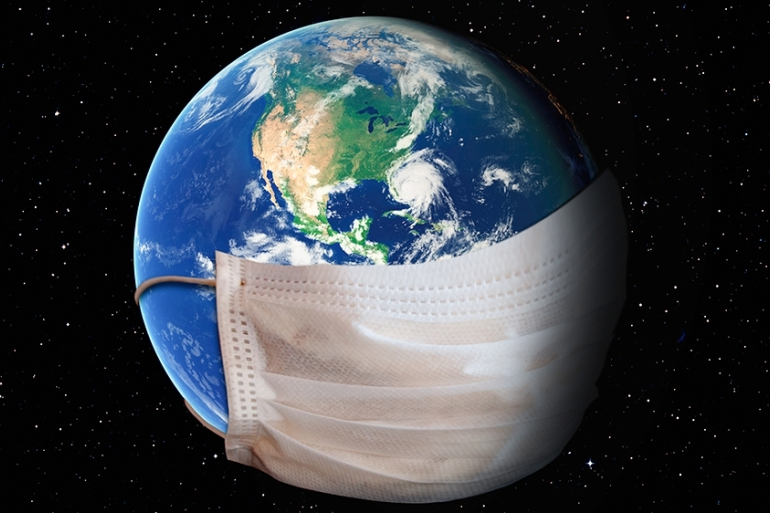

# How it started in Pakistan?

Pakistan witnessed its first Corona virus patient on February 26th 2020. Despite being the world's 5th-most-populous country, Pakistan only has so far recorded the world's 29th-highest death toll (at approximately 23,087) and 29th-highest number of confirmed cases (at approximately 1,011,708). 
Pakistan so far has experienced three different waves of COVID-19. Covid-19 has so far affected over 100,000 children in Pakistan, of which 211 children have died due to the complications of viral infection, leading child specialists of the country on Wednesday said and urged parents to get their children vaccinated to save them from the infection and to resume educational activities.
COVID-19 infections are decreasing in Pakistan, with 3,089 new infections reported on average each day. That’s 53% of the peak — the highest daily average reported on June 17.
There have been 1,215,821 infections and 27,004 coronavirus-related deaths reported in the country since the pandemic began. 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
import pandas as pd

In [112]:
pak_covid_df = pd.read_csv('pakcovid.csv')

The dataset has been downloaded and extracted.

In [113]:
# The dataset taken from kaggle on the covid condition of Pakistan from date 26-02-2020.
pak_covid_df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Test per day
0,2/26/2020,112,8,133,China,Islamabad Capital Territory,Lahore,667
1,2/26/2020,60,7,132,Iran/Taftan,Sindh,Karachi,945
2,2/29/2020,56,3,110,China,Islamabad Capital Territory,Islamabad,805
3,2/29/2020,83,4,141,Iran/Taftan,Sindh,Karachi,510
4,03/02/2020,83,3,145,Iran/Taftan,Gilgit-Baltistan,Gilgit,877
...,...,...,...,...,...,...,...,...
1323,05/10/2020,565,84,431,Local - Social Contact,Sindh,Karachi,943
1324,05/10/2020,920,93,432,Local - Social Contact,Baluchistan,Quetta,968
1325,05/10/2020,1029,68,428,Local - Social Contact,Gilgit-Baltistan,Gilgit,658
1326,05/10/2020,510,89,438,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar,801


Let us save and upload our work to Jovian before continuing.

In [123]:
project_name = "zerotopandas-course-project-pakcovid" # change this (use lowercase letters and hyphens only)

In [124]:
!pip install jovian --upgrade -q

In [125]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [5]:
import numpy as np

In [7]:
#the information about the dataset that each attribute contains how many coloumns, and their datatypes.
pak_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1328 non-null   object
 1   Cases           1328 non-null   int64 
 2   Deaths          1328 non-null   int64 
 3   Recovered       1328 non-null   int64 
 4   Travel_history  1328 non-null   object
 5   Province        1328 non-null   object
 6   City            1328 non-null   object
 7   Test per day    1328 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 83.1+ KB


In [8]:
#Giving the count, , mean,standard deviation and min and max values for the integer type attributes.
pak_covid_df.describe()

,Cases,Deaths,Recovered,Test per day
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,488.722139,60.385542,212.246235,753.238705
std,396.399573,28.542365,86.919501,145.107447
min,50.000000,0.000000,100.000000,500.000000
25%,113.750000,45.750000,128.000000,628.750000
50%,496.000000,66.000000,217.500000,757.000000
75%,869.000000,83.000000,290.000000,878.000000
max,1200.000000,100.000000,448.000000,1000.000000


In [19]:
pak_covid_df.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Travel_history', 'Province',
       'City', 'Test per day'],
      dtype='object')

In [114]:
#checking the datatype of the Date.
pak_covid_df.Date

0        2/26/2020
1        2/26/2020
2        2/29/2020
3        2/29/2020
4       03/02/2020
           ...    
1323    05/10/2020
1324    05/10/2020
1325    05/10/2020
1326    05/10/2020
1327    05/10/2020
Name: Date, Length: 1328, dtype: object

### Changing the format of column Date from Object to Date-time format.  

In [115]:
#As we are going to access data as a date-time format we will convert it from float to date-time.
pak_covid_df['Date'] = pd.to_datetime(pak_covid_df.Date)

In [116]:
pak_covid_df.Date

0      2020-02-26
1      2020-02-26
2      2020-02-29
3      2020-02-29
4      2020-03-02
          ...    
1323   2020-05-10
1324   2020-05-10
1325   2020-05-10
1326   2020-05-10
1327   2020-05-10
Name: Date, Length: 1328, dtype: datetime64[ns]

#### The date is changed to date-time format.

In [26]:
shape = pak_covid_df.shape
print("The covid Dataset has", format(int(shape[0])), "rows and" ,format(int(shape[1])), " columns.")

The covid Dataset has 1328 rows and 8  columns.


In [13]:
#Counting the values for each rach province.
pak_covid_df['Province'].value_counts()

Khyber Pakhtunkhwa                    513
Punjab                                317
Sindh                                 241
Gilgit-Baltistan                       80
Baluchistan                            59
Islamabad Capital Territory            40
Federal Administration Tribal Area     36
Azad Jummu Kashmir                     30
islamabad Capital Territory            10
khyber Pakhtunkhwa                      2
Name: Province, dtype: int64

### Checking if there are any unique or duplicate values in the Dataset and then removing it.

In [29]:
pak_covid_df.Province.unique

<bound method Series.unique of 0       Islamabad Capital Territory
1                             Sindh
2       Islamabad Capital Territory
3                             Sindh
4                  Gilgit-Baltistan
                   ...             
1323                          Sindh
1324                    Baluchistan
1325               Gilgit-Baltistan
1326             Khyber Pakhtunkhwa
1327             Azad Jummu Kashmir
Name: Province, Length: 1328, dtype: object>

### Correcting spelling mistakes.

In [117]:
correction = {
    "khyber Pakhtunkhwa": "Khyber Pakhtunkhwa",
    "islamabad Capital Territory": "Islamabad Capital Territory"
}
#changing the Province incoorect spelling to the correct ones, inroder to remove duplicates.
pak_covid_df["Province"] = pak_covid_df["Province"].replace(correction)
pak_covid_df["Province"].value_counts()

Khyber Pakhtunkhwa                    515
Punjab                                317
Sindh                                 241
Gilgit-Baltistan                       80
Baluchistan                            59
Islamabad Capital Territory            50
Federal Administration Tribal Area     36
Azad Jummu Kashmir                     30
Name: Province, dtype: int64

In [16]:
#checking if there are any null values in each column.
pak_covid_df.isnull().sum()

Date              0
Cases             0
Deaths            0
Recovered         0
Travel_history    0
Province          0
City              0
Test per day      0
dtype: int64

In [18]:
#checking the unique and incorrect values for cities.
pak_covid_df['City'].unique

<bound method Series.unique of 0             Lahore
1            Karachi
2          Islamabad
3            Karachi
4             Gilgit
            ...     
1323         Karachi
1324          Quetta
1325          Gilgit
1326        Peshawar
1327    Muzaffarabad
Name: City, Length: 1328, dtype: object>

### Adding a column for the "Total Active Cases" in Pakistan Daily.

In [118]:
#Adding a new column for active cases that canbe calculated by subtracting the sum of recovered and deaths from Cases.
pak_covid_df['Active'] = pak_covid_df['Cases'] - (pak_covid_df['Recovered'] + pak_covid_df['Deaths'])
pak_covid_df['Active'] = pak_covid_df['Active'].astype(int)

In [119]:
pak_covid_df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Test per day,Active
0,2020-02-26,112,8,133,China,Islamabad Capital Territory,Lahore,667,-29
1,2020-02-26,60,7,132,Iran/Taftan,Sindh,Karachi,945,-79
2,2020-02-29,56,3,110,China,Islamabad Capital Territory,Islamabad,805,-57
3,2020-02-29,83,4,141,Iran/Taftan,Sindh,Karachi,510,-62
4,2020-03-02,83,3,145,Iran/Taftan,Gilgit-Baltistan,Gilgit,877,-65
...,...,...,...,...,...,...,...,...,...
1323,2020-05-10,565,84,431,Local - Social Contact,Sindh,Karachi,943,50
1324,2020-05-10,920,93,432,Local - Social Contact,Baluchistan,Quetta,968,395
1325,2020-05-10,1029,68,428,Local - Social Contact,Gilgit-Baltistan,Gilgit,658,533
1326,2020-05-10,510,89,438,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar,801,-17


In [93]:
#displaying a random set of 10 rows.
pak_covid_df.sample(10)

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Test per day,Active
1016,2020-04-24,746,89,301,Local - Social Contact,Khyber Pakhtunkhwa,Swat,875,356
1132,2020-04-29,1080,69,330,Local - Social Contact,Sindh,Khairpur,801,681
894,2020-04-21,897,81,229,Local - Social Contact,Khyber Pakhtunkhwa,Swabi,652,587
128,2020-03-25,98,8,108,Unknown,Punjab,Lahore,665,-18
880,2020-04-20,903,67,309,Local - Social Contact,Khyber Pakhtunkhwa,Swat,562,527
1261,2020-05-04,649,72,274,Local - Social Contact,Khyber Pakhtunkhwa,Buner,989,303
906,2020-04-21,1193,66,281,Local - Social Contact,Islamabad Capital Territory,Islamabad,663,846
715,2020-04-15,1002,92,286,Local - Social Contact,Federal Administration Tribal Area,Khyber,572,624
1267,2020-05-04,898,87,318,Local - Social Contact,Khyber Pakhtunkhwa,Chitral Upper,501,493
1146,2020-04-30,520,54,340,Local - Social Contact,Sindh,Sanghar,605,126


### Calculating the Recovery and Positivity Rate per Province

In [94]:
#grouping the data for province.
Province = pak_covid_df.groupby('Province',axis=0).sum()

In [95]:
Province['recovery_rate']=(Province.Recovered/Province.Cases)*100
Province['positivity'] = (Province.Cases/Province['Test per day'])*100

In [26]:
#displaying the dataset for grouped by province.
Province.sort_values('Cases', ascending= False).style.background_gradient(cmap='Blues',subset=["Cases"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["positivity"])\
                        .background_gradient(cmap='Blues',subset=["recovery_rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Test per day"])

,Cases,Deaths,Recovered,Test per day,Active,recovery_rate,positivity
Province,,,,,,,
Khyber Pakhtunkhwa,279220,33561,114646,387961,131013,41.059380,71.971152
Sindh,144332,14724,55336,180969,74272,38.339384,79.755096
Punjab,113328,17337,59093,239203,36898,52.143336,47.377332
Gilgit-Baltistan,31656,4509,15468,60244,11679,48.862775,52.546312
Baluchistan,29153,3228,12808,43268,13117,43.933729,67.377739
Islamabad Capital Territory,25671,2581,10817,38928,12273,42.137042,65.944821
Azad Jummu Kashmir,14262,2091,6836,21732,5335,47.931566,65.626726
Federal Administration Tribal Area,11401,2161,6859,27996,2381,60.161389,40.723675


### Calculating Recovery and Positivity Rate per City

In [66]:
#grouping the data for city.
City = pak_covid_df.groupby('City',axis=0).sum()

In [67]:
City['recovery_rate']=(City.Recovered/City.Cases)*100
City['positivity'] = (City.Cases/City['Test per day'])*100


In [68]:
#displaying the dataset for grouped by City.
City.sort_values('Cases', ascending= False).style.background_gradient(cmap='Blues',subset=["Cases"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["positivity"])\
                        .background_gradient(cmap='Blues',subset=["recovery_rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Test per day"])

,Cases,Deaths,Recovered,Test per day,Active,recovery_rate,positivity
City,,,,,,,
Peshawar,35161,4057,14241,47298,16863,40.502261,74.339296
Karachi,28899,3516,13873,54108,11510,48.005121,53.409847
Lahore,27300,3478,13440,46828,10382,49.230769,58.298454
Quetta,25878,2961,11767,39609,11150,45.471056,65.333636
Islamabad,22581,2354,9894,35835,10333,43.815597,63.013813
Gilgit,22219,2346,8647,26160,11226,38.917143,84.935015
Swat,14004,1886,6339,19982,5779,45.265638,70.083075
Muzaffarabad,12910,1820,5935,17570,5155,45.972115,73.477518
Buner,12295,1576,5139,17394,5580,41.797479,70.685294


In [79]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anusha-saad01/zerotopandas-course-project-pakcovid" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid


'https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



In [49]:
!pip install plotly-express

     |████████████████████████████████| 23.9 MB 8.1 MB/s eta 0:00:01    |███▎                            | 2.5 MB 8.1 MB/s eta 0:00:03


> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [50]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly_express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [51]:
Deaths = pak_covid_df.Deaths.sum()
Cases = pak_covid_df.Cases.sum()
Recovered = pak_covid_df.Recovered.sum()
Active =pak_covid_df.Active.sum()

# 

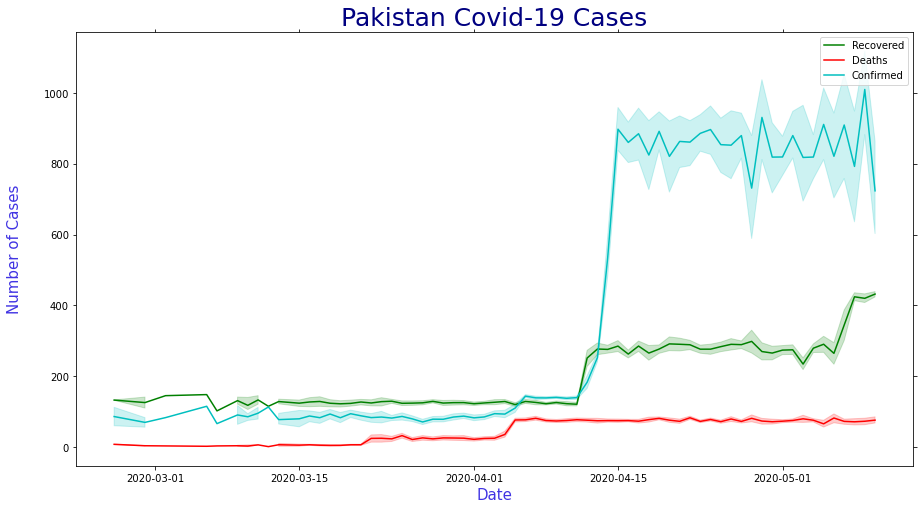

In [37]:
#displaying a lineplot to show the overall situation in pakistan.
fig, ax = plt.subplots(figsize=(15, 8))
ax.clear()
fig = sns.lineplot(x="Date",y="Recovered",data = pak_covid_df ,color="green", label="Recovered");
fig = sns.lineplot(x="Date",y="Deaths",data = pak_covid_df ,color="r", label="Deaths");
fig = sns.lineplot(x="Date",y="Cases",data = pak_covid_df ,color="c" ,label="Confirmed");
fig.set_xlabel('Date\n',size=15,color='#4134E3');
fig.set_ylabel('Number of Cases\n',size=15,color='#4134E3');
fig.set_title('Pakistan Covid-19 Cases',size=25,color='navy');

### From the above plot lines:
   It shows that the covid in cases in Pakistan are rising since 15th of april,2020.

### Evaluating the Dataset Province-wise

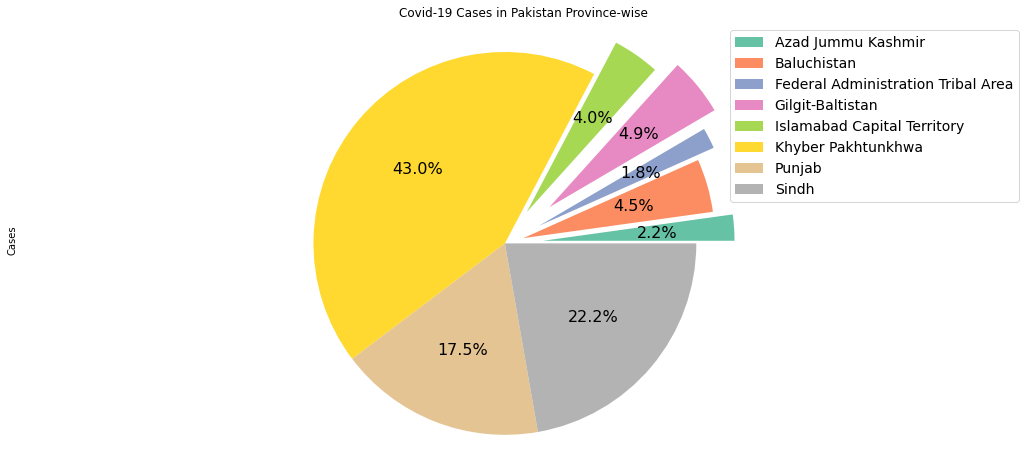

In [38]:
color = palette = sns.color_palette("Set2")
Province['Cases'].plot(kind='pie',figsize = (18, 8),autopct = '%1.1f%%', startangle = 0,labels= None,textprops = dict(color='black', fontsize=16),
                       explode = [0.2, 0.1, 0.2, 0.3, 0.2,0,0,0], colors=color)
plt.title("Covid-19 Cases in Pakistan Province-wise")
plt.axis('equal')
plt.legend(labels=Province.index, loc='upper right', fontsize=14)
plt.show()

### From the above plot Pie chart:
   The Pie chart shows that the Province "Khyber Pakhtunkhwa" have the highest number of cases in Pakistan with a average of 43.0%. The second highest is Sindh with 22.2% and third is Punjab with 17.5% whereas the of the provinces have an average around 2% - 5%.

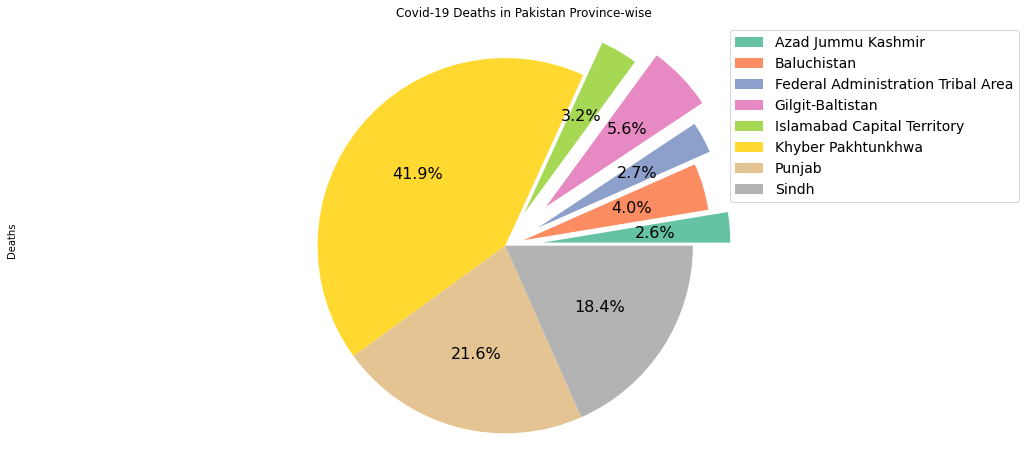

In [39]:
color = palette = sns.color_palette("Set2")
Province['Deaths'].plot(kind='pie',figsize = (18, 8),autopct = '%1.1f%%', startangle = 0,labels= None,textprops = dict(color='black', fontsize=16),
                       explode = [0.2, 0.1, 0.2, 0.3, 0.2,0,0,0], colors=color)
plt.title("Covid-19 Deaths in Pakistan Province-wise")
plt.axis('equal')
plt.legend(labels=Province.index, loc='upper right', fontsize=14)
plt.show();

### From the above plot Pie chart:
The Pie chart shows that the Province "Khyber Pakhtunkhwa" have the highest number of Deaths in Pakistan since the covid started with a average of 41.9%. The second highest is Punjab with 21.6% and third is Sindh with 18.4% whereas the of the provinces have an average around 2% - 5%.

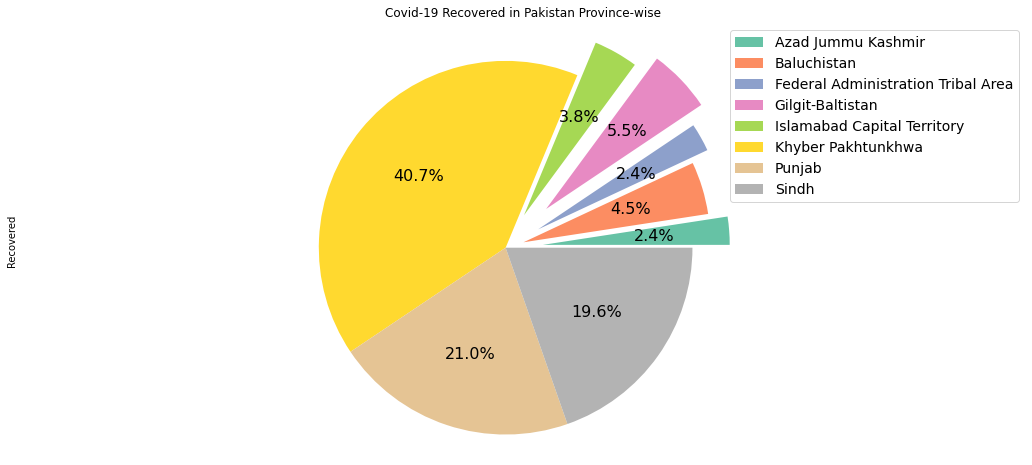

In [40]:
color = palette = sns.color_palette("Set2")
Province['Recovered'].plot(kind='pie',figsize = (18, 8),autopct = '%1.1f%%', startangle = 0,labels= None,textprops = dict(color='black', fontsize=16),
                       explode = [0.2, 0.1, 0.2, 0.3, 0.2,0,0,0], colors=color)
plt.title("Covid-19 Recovered in Pakistan Province-wise")
plt.axis('equal')
plt.legend(labels=Province.index, loc='upper right', fontsize=14)
plt.show();

### From the above plot Pie chart:
The Pie chart shows that the Province "Khyber Pakhtunkhwa" have the highest number of Recovered Patients in Pakistan with a average of 40.7%. The second highest is Punjab with 21.0% and third is Sindh with 19.6% whereas the of the provinces have an average around 2% - 5%.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

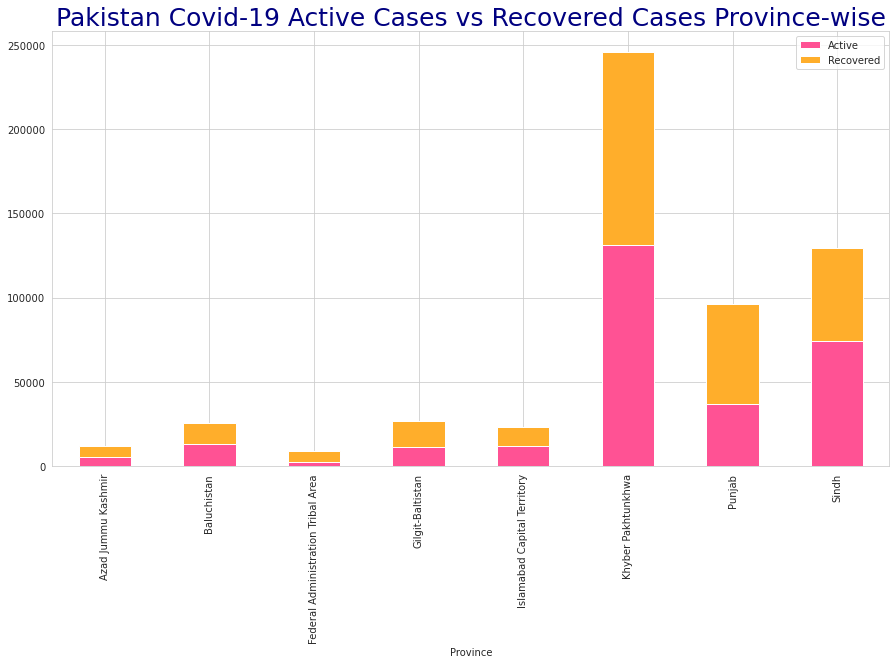

In [45]:
#Camparing the recovered with the Active cases of each Province.
Active = Province.Active
Rec = Province.Recovered
sns.set_style('whitegrid')
df = pd.DataFrame({'Active': Active,
                   'Recovered': Rec}, index=Province.index);
ax = df.plot.bar(figsize=(15,8), stacked=True, color = ['#ff5294','#ffae2b']);
ax.set_title('Pakistan Covid-19 Active Cases vs Recovered Cases Province-wise',size=25,color='navy');

### From the above plot Bar chart:
   The Bar Chart shows the comparison that the recovered cases are always greater than the Active cases in each province.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

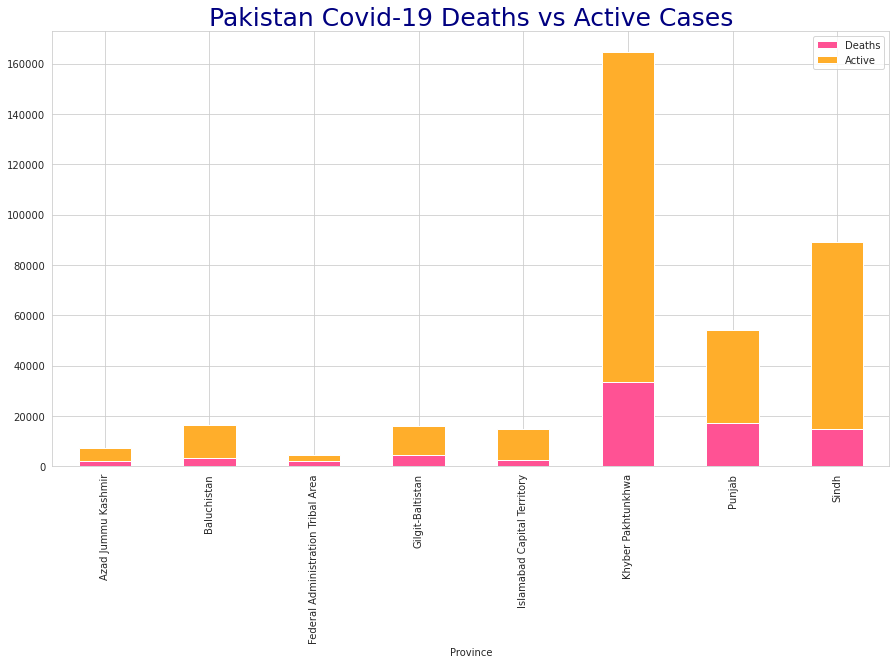

In [46]:
#Camparing the Active cases with the Deaths of each Province.
Active = Province.Active
Deaths = Province.Deaths
sns.set_style('whitegrid')
df = pd.DataFrame({'Deaths': Deaths,
                   'Active': Active}, index=Province.index);
ax = df.plot.bar(figsize=(15,8), stacked=True, color = ['#ff5294','#ffae2b']);
ax.set_title('Pakistan Covid-19 Deaths vs Active Cases',size=25,color='navy');

### From the above plot Bar chart:
The Bar Chart shows the comparison that the  Deaths happened in each Province are always less than the Active cases in each province.

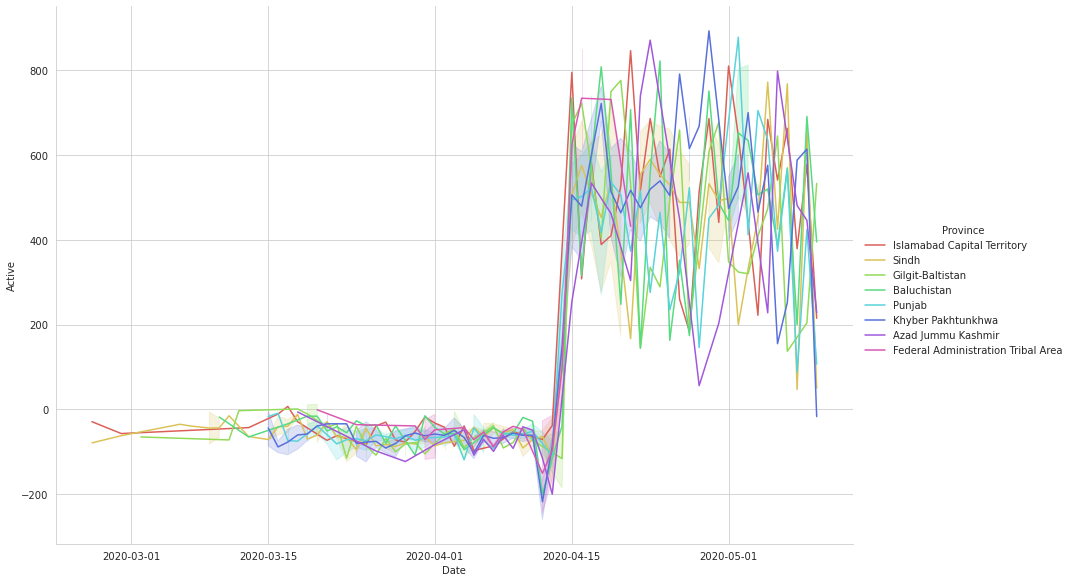

In [47]:
# Define the palette as a list to specify exact values
palette = sns.color_palette("hls", 8)
# Plot the lines on two facets

#plotting a re-plot for the active cases in each province.
sns.relplot(
    data=pak_covid_df,
    x="Date", y="Active",
    hue="Province",
    kind="line", palette=palette,
    height=8, aspect=1.5
);

In [74]:
#Getting the 10 main cities of pakistan.
City = City.sort_values('Cases',ascending=False).head(10)

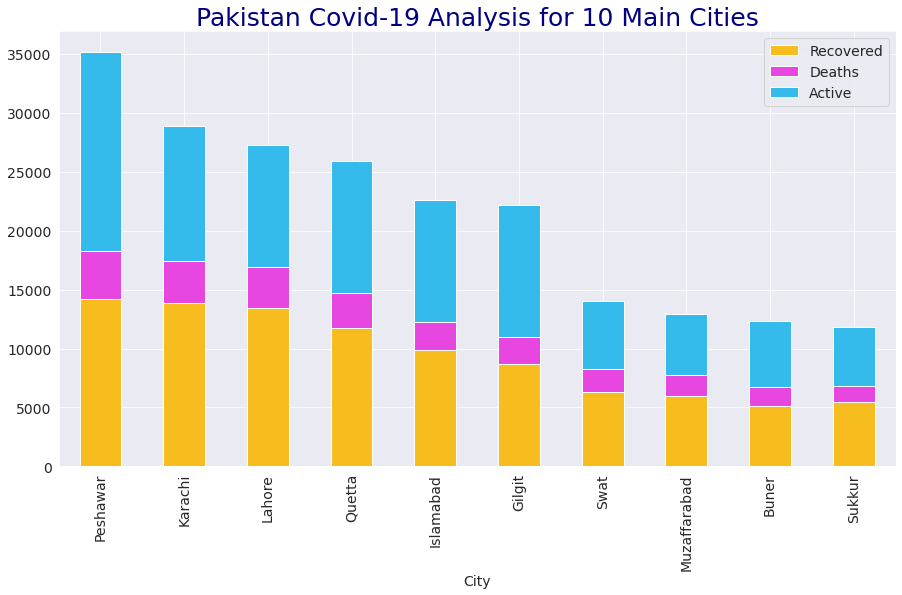

In [76]:
#combine analysis of Deaths, Active cases and recovered for 10 main cities of Pakistan
color= ['#f7bd1e','#e846e0','#34baeb']
sns.set_style('darkgrid')
df = pd.DataFrame({'Recovered': City.Recovered, 'Deaths' : City.Deaths, 'Active':City.Active}, index=City.index);
ax = df.plot.bar(figsize=(15,8),color=color ,stacked=True);
ax.set_title('Pakistan Covid-19 Analysis for 10 Main Cities',size=25,color='navy');

### From the above plot bar chart:
   We can see from the above chart that the Active cases have the highest ratio in each city than Deaths. and the recovered cases have the lowest with shows that Pakistan had been going through a very tough wave. Peshawar have the highest number of active cases and the Sukkur have the lowest.

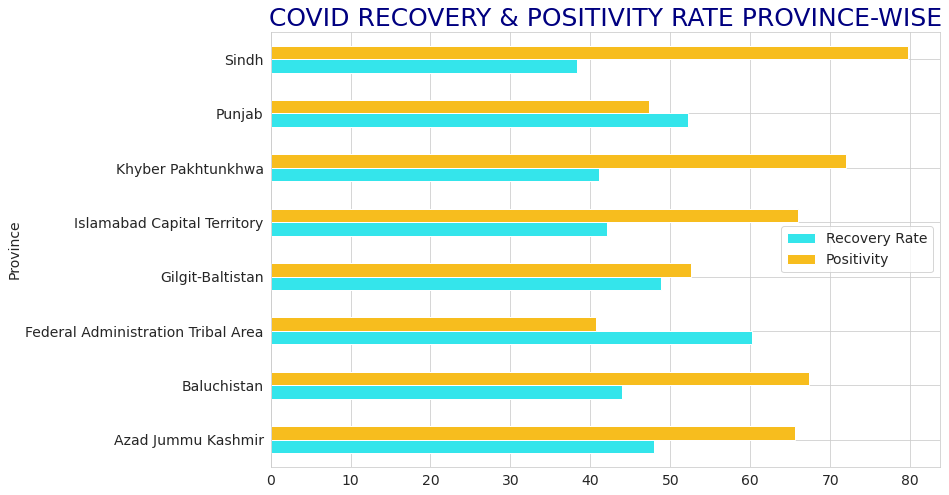

In [77]:
#Plotting for the Recovery and Positivity rate of each province.
color= ['#34e5eb','#f7bd1e']
sns.set_style('whitegrid')
df = pd.DataFrame({'Recovery Rate': Province.recovery_rate, 'Positivity':Province.positivity}, index=Province.index);
ax = df.plot.barh(figsize=(12,8), color=color);
ax.set_title('COVID RECOVERY & POSITIVITY RATE PROVINCE-WISE',size=25,color='navy');

### From the above plot bar chart:
We can see from the above chart that each Province have high Positivity rate except for Punjab and Federal Administration Tribal Area have low which is not a good sign as almost all province are having high number of positive cases and the recovery rate is low. Only Federal Administration Tribal Area have the highest positivity rate. Khyber pakhtunkhwa have the highest positivity rate with the average of 72.4%. 

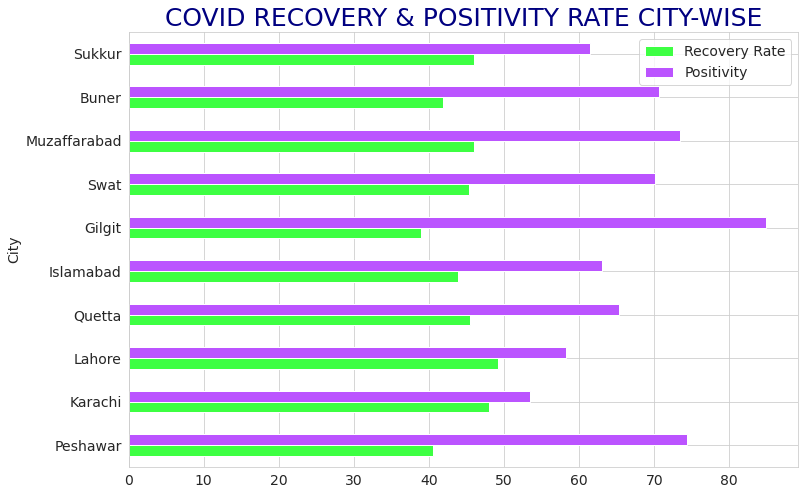

In [78]:
color= ['#3dff43','#bb54ff']
df = pd.DataFrame({'Recovery Rate': City.recovery_rate, 'Positivity':City.positivity}, index=City.index);
ax = df.plot.barh(figsize=(12,8), color=color);
ax.set_title('COVID RECOVERY & POSITIVITY RATE CITY-WISE',size=25,color='navy');

### From the above plot bar chart:
We can see from the above chart that Cities in Pakistan have high Positivity rate. Almost all main big Cities are having high number of positive cases and the recovery rate is low. Gilgit have the highest positivity rate with the average of almost 85.6% and lowest recovery rate with the average of 38.1%. 

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anusha-saad01/zerotopandas-course-project-pakcovid" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid


'https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - What is the Daily covid recovered per(100) rate?

In [96]:
pak_covid_df["Recovery Rate(per 100)"] = np.round(100*pak_covid_df["Recovered"]/pak_covid_df["Active"],2)
pak_covid_df[["Date","Recovery Rate(per 100)"]]

,Date,Recovery Rate(per 100)
0,2020-02-26,-458.62
1,2020-02-26,-167.09
2,2020-02-29,-192.98
3,2020-02-29,-227.42
4,2020-03-02,-223.08
...,...,...
1323,2020-05-10,862.00
1324,2020-05-10,109.37
1325,2020-05-10,80.30
1326,2020-05-10,-2576.47


Analyzing the Recovery Rate in Pakistan on Daily basis.

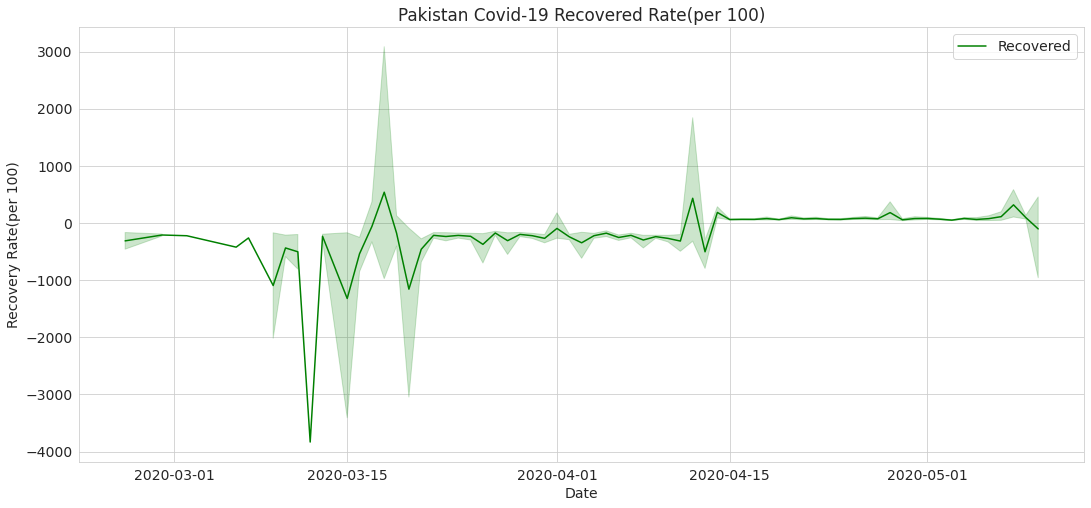

In [97]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
fig = sns.lineplot(x=pak_covid_df['Date'], y=pak_covid_df["Recovery Rate(per 100)"],color="green", label="Recovered");
plt.title("Pakistan Covid-19 Recovered Rate(per 100)")
plt.show()

#### Q2: TODO - Morality Rate(per 100) Daily in Pakistan?

In [98]:
pak_covid_df["Morality_Rate(per 100)"] = np.round(100*pak_covid_df["Deaths"]/pak_covid_df["Active"],2)
pak_covid_df[["Date","Morality_Rate(per 100)"]]


,Date,Morality_Rate(per 100)
0,2020-02-26,-27.59
1,2020-02-26,-8.86
2,2020-02-29,-5.26
3,2020-02-29,-6.45
4,2020-03-02,-4.62
...,...,...
1323,2020-05-10,168.00
1324,2020-05-10,23.54
1325,2020-05-10,12.76
1326,2020-05-10,-523.53


Analyzing the Morality Rate(per 100) in Pakistan

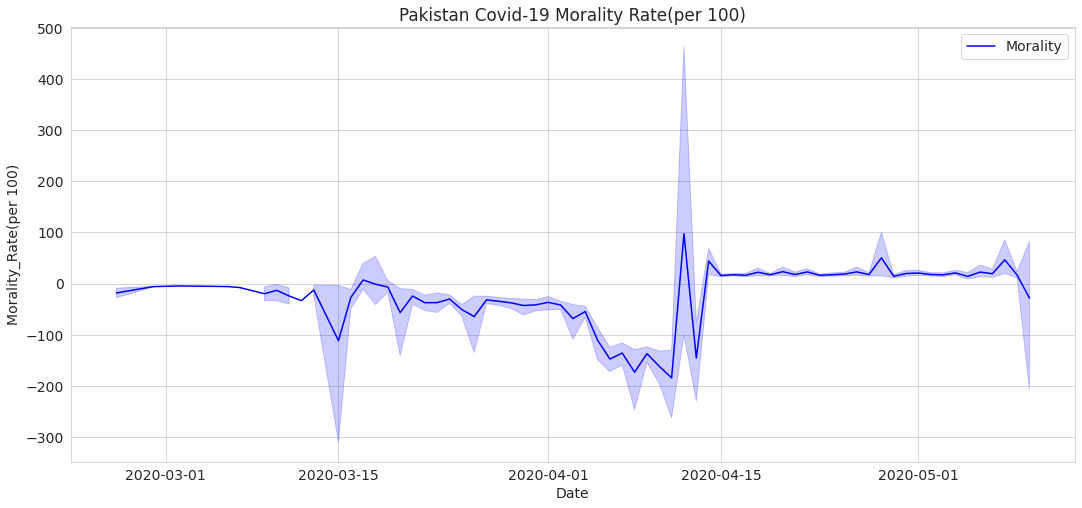

In [99]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
fig = sns.lineplot(x=pak_covid_df['Date'], y=pak_covid_df["Morality_Rate(per 100)"],color="blue", label="Morality");
plt.title("Pakistan Covid-19 Morality Rate(per 100)")
plt.show()

#### Q3: TODO - What are the Total Cases Recovered, Total Deaths , The total active cases ?

In [100]:
total = pak_covid_df

In [101]:
del total['Date']
del total['City']
del total['Province']
del total['Recovery Rate(per 100)']
del total['Morality_Rate(per 100)']
del total['Travel_history']

In [102]:
total

,Cases,Deaths,Recovered,Test per day,Active
0,112,8,133,667,-29
1,60,7,132,945,-79
2,56,3,110,805,-57
3,83,4,141,510,-62
4,83,3,145,877,-65
...,...,...,...,...,...
1323,565,84,431,943,50
1324,920,93,432,968,395
1325,1029,68,428,658,533
1326,510,89,438,801,-17


In [ ]:
total = total.sum()
total.name = "Total"
df = pd.DataFrame(total,dtype=float).transpose()

In [107]:
df.style.set_properties(**{'background-color': 'blue',
                           'color': 'white'})
df

,Cases,Deaths,Recovered,Test per day,Active
Total,649023.0,80192.0,281863.0,1000301.0,286968.0


The total Cases , Deaths, Recovered ,Test per day and  Active cases in Pakistan up till now.

#### Q4: TODO - Which Province had the minimun cases, recovered,  deaths, minimum active cases, min Positivity rate and min Recovery rate?

In [109]:
Province.style.highlight_min(color='#f7bd1e')

,Cases,Deaths,Recovered,Test per day,Active,recovery_rate,positivity
Province,,,,,,,
Azad Jummu Kashmir,14262,2091,6836,21732,5335,47.931566,65.626726
Baluchistan,29153,3228,12808,43268,13117,43.933729,67.377739
Federal Administration Tribal Area,11401,2161,6859,27996,2381,60.161389,40.723675
Gilgit-Baltistan,31656,4509,15468,60244,11679,48.862775,52.546312
Islamabad Capital Territory,25671,2581,10817,38928,12273,42.137042,65.944821
Khyber Pakhtunkhwa,279220,33561,114646,387961,131013,41.059380,71.971152
Punjab,113328,17337,59093,239203,36898,52.143336,47.377332
Sindh,144332,14724,55336,180969,74272,38.339384,79.755096


##### Highliting the values in the provinces that are minimun for cases, recovered, deaths, minimum active cases, min Positivity rate and min Recovery rate

#### Q5: TODO - What is the Daily incidence Rate in Pakistan?

In [120]:
pak_covid_df["Incidence_Rate(per 100)"] = np.round(100*pak_covid_df["Cases"]/pak_covid_df["Active"],2)
pak_covid_df[["Date","Incidence_Rate(per 100)"]]

,Date,Incidence_Rate(per 100)
0,2020-02-26,-386.21
1,2020-02-26,-75.95
2,2020-02-29,-98.25
3,2020-02-29,-133.87
4,2020-03-02,-127.69
...,...,...
1323,2020-05-10,1130.00
1324,2020-05-10,232.91
1325,2020-05-10,193.06
1326,2020-05-10,-3000.00


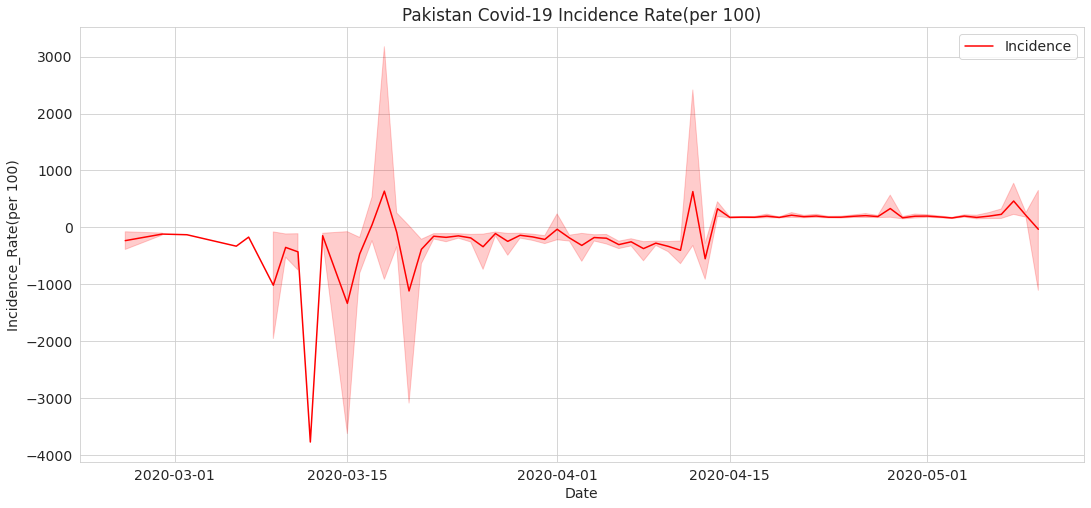

In [121]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))
fig = sns.lineplot(x=pak_covid_df['Date'], y=pak_covid_df["Incidence_Rate(per 100)"],color="red", label="Incidence");
plt.title("Pakistan Covid-19 Incidence Rate(per 100)")
plt.show()

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [122]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anusha-saad01/zerotopandas-course-project-pakcovid" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid


'https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [30]:
import jovian

In [202]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anusha-saad01/zerotopandas-course-project-pakcovid" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid


'https://jovian.ai/anusha-saad01/zerotopandas-course-project-pakcovid'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'